In [2]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import keras.backend.tensorflow_backend as K
import tensorflow as tf
from keras import regularizers

C:\Users\dnjsw\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\dnjsw\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\dnjsw\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\dnjsw\Anaconda3\lib\site-packages\tensorflow\python\framework\

In [3]:
from keras import layers, models
from keras.applications import VGG16
from keras import Input
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers, initializers, regularizers, metrics
from keras.callbacks import ModelCheckpoint
import os
from glob import glob
import PIL
import matplotlib.pyplot as plt
import numpy as np

In [4]:
import cv2

In [5]:
caltech_dir = "C:/Users/dnjsw/python/p-project/product_recog/image"
categories = ["apple","grape","kiwi","mandarin","melon","pear",
          "persimmon","potato","strawberry","sweet_potato",
              "tomato","watermelon","unrecog"]
nb_classes = len(categories)

In [6]:
image_w = 240
image_h = 320

pixels = image_h * image_w * 3

X = []
y = []

In [7]:
for idx, cat in enumerate(categories):
    
    #one-hot encoding
    label = [0 for i in range(nb_classes)]
    label[idx] = 1

    image_dir = caltech_dir + "/" + cat
    files = glob(image_dir+"/*.png")
    for i, f in enumerate(files):
        img = cv2.imread(f)
        img = cv2.resize(img,dsize=(image_w, image_h),interpolation=cv2.INTER_AREA)
        data = np.asarray(img)

        X.append(data)
        y.append(label)

        if i % 1000 == 0:
            print(cat, " : ", f)


apple  :  C:/Users/dnjsw/python/p-project/product_recog/image/apple\apple.png
grape  :  C:/Users/dnjsw/python/p-project/product_recog/image/grape\grape.png
kiwi  :  C:/Users/dnjsw/python/p-project/product_recog/image/kiwi\kiwi.png
mandarin  :  C:/Users/dnjsw/python/p-project/product_recog/image/mandarin\mandarin.png
melon  :  C:/Users/dnjsw/python/p-project/product_recog/image/melon\melon.png
pear  :  C:/Users/dnjsw/python/p-project/product_recog/image/pear\pear.png
persimmon  :  C:/Users/dnjsw/python/p-project/product_recog/image/persimmon\persimmon.png
potato  :  C:/Users/dnjsw/python/p-project/product_recog/image/potato\potato.png
strawberry  :  C:/Users/dnjsw/python/p-project/product_recog/image/strawberry\strawberry.png
sweet_potato  :  C:/Users/dnjsw/python/p-project/product_recog/image/sweet_potato\sweet_potato.png
tomato  :  C:/Users/dnjsw/python/p-project/product_recog/image/tomato\tomato.png
watermelon  :  C:/Users/dnjsw/python/p-project/product_recog/image/watermelon\waterme

In [8]:
X = np.array(X)
y = np.array(y)


X_train, X_test, y_train, y_test = train_test_split(X, y)
xy = (X_train, X_test, y_train, y_test)

In [9]:
print(X_train.shape)
print(X_train.shape[0])

(983, 320, 240, 3)
983


In [10]:
#일반화
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [11]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(320, 240, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(13, activation='sigmoid'))

In [12]:
model.summary

<bound method Network.summary of <keras.engine.sequential.Sequential object at 0x00000218A26AD0F0>>

In [13]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [14]:
history = model.fit(X_train, y_train, 
                    batch_size=100, 
                    epochs=10, 
                    validation_data=(X_test, y_test))


Train on 983 samples, validate on 328 samples
Epoch 1/1
983/983 [==============================] - 361s 367ms/step - loss: 1.1860 - acc: 0.8684 - val_loss: 1.2399 - val_acc: 0.9231


In [15]:
print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))

328/328 [==============================] - 9s 29ms/step
정확도 : 0.9231


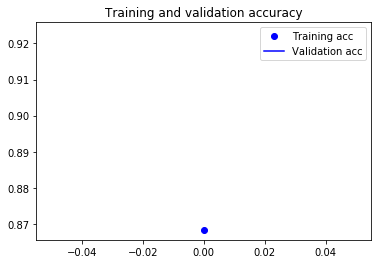

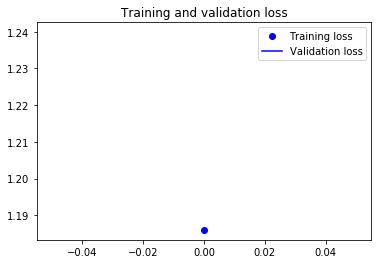

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from keras.models import load_model

model.save('product_prediction_model.h5')

In [12]:
model_json = model.to_json()
with open("model.json", "w") as json_file : 
    json_file.write(model_json)

In [14]:
model.save_weights("model_w2.h5")
print("Saved model to disk")

Saved model to disk


In [1]:
print("A")

A
